<a href="https://colab.research.google.com/github/RuzhiyKot/Blue_Chips_and_Pink_Guarantees-Tracking_Large_Volumes_in_the_Stock_Market/blob/main/JestkayChistka_remarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import requests as rq
import csv
import json

# Реализация через csv-файл

## Загрузка и первоначльная обработка данных

In [53]:
# Ссылка на данные
url = "https://iss.moex.com/iss/analyticalproducts/futoi/securities.csv"

In [54]:
# Отправляем GET-запрос по указанному URL
response = rq.get(url)

# Проверяем, был ли запрос успешным (код состояния HTTP 200)
if response.status_code == 200:
    # Открываем файл для записи в бинарном режиме
    with open("securities.csv", "wb") as csv_file:
        # Записываем содержимое ответа (CSV-файла) в локальный файл
        csv_file.write(response.content)
else:
    print("Не удалось скачать файл. Код состояния HTTP:", response.status_code)

In [55]:
# Разделяем информацию в файле
with open('securities.csv', 'r', newline='') as csv_file:
  spamreader = csv.reader(csv_file, delimiter=' ', quotechar='|')
  #for row in spamreader:
    #print('; '.join(row))

In [56]:
# Удаляем ненужные строк с мусором в начале и конце файла
with open('securities.csv', 'r') as csv_file:
    # Создаем объект для чтения csv файла
    reader = csv.reader(csv_file)
    # Указываем количество пропускаемых в конце строчек
    rows_to_skip = len(list(reader)) - 7
    # Переносик каретку (указатель) чтения на начало файла
    csv_file.seek(0)
    # Пропускаем первую строку
    next(reader)
    # Создаем объект для чтения csv файла снова
    reader = csv.reader(csv_file)
    # Открываем csv файл для записи
    with open('new_file.csv', 'w') as new_csv_file:
        # Создаем объект для записи в csv файл
        writer = csv.writer(new_csv_file)
        # Записываем оставшиеся строки из исходного файла в новый файл
        for i, row in enumerate(reader):
            if i < rows_to_skip:
                writer.writerow(row)

In [57]:
# Выводим файл, указывая разделитель ';'
df = pd.read_csv('new_file.csv', sep=";")
df = df.sort_values(by=['ticker', 'tradetime']).reset_index().drop('index', axis=1)
#df

## Обработка данных

In [58]:
# Стиль графиков 
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6)

pd.options.mode.chained_assignment = None

In [59]:
print(df.shape)
print(df.dtypes)

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(1000, 12)
sess_id           int64
seqnum            int64
tradedate        object
tradetime        object
ticker           object
clgroup          object
pos               int64
pos_long          int64
pos_short         int64
pos_long_num      int64
pos_short_num     int64
systime          object
dtype: object
['sess_id' 'seqnum' 'pos' 'pos_long' 'pos_short' 'pos_long_num'
 'pos_short_num']
['tradedate' 'tradetime' 'ticker' 'clgroup' 'systime']


### Отсутствующие данные

<Axes: >

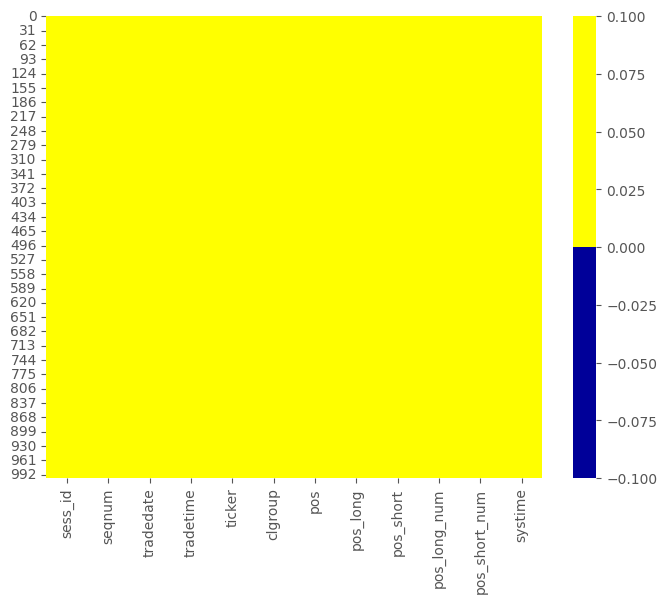

In [60]:
cols = df.columns[:1000] # первые 1000 колонок
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

В нашем случае никаких пропущенных данных нет, значит эту статистику можно пропустить

### Аномальные значения

Разделим данные на физиков и юриков, а также по тикерам.

In [61]:
df_fiz = df[df['clgroup'] == 'FIZ']
df_yur = df[df['clgroup'] == 'YUR']
# Разделение таблицы для FIZ по ticker
fiz_tables = {}
for ticker, group in df_fiz.groupby('ticker'):
    fiz_tables[ticker] = group.drop(['sess_id', 'seqnum', 'tradedate', 'tradetime', 'systime', 'ticker', 'clgroup'], axis=1).reset_index().drop('index', axis=1)


# Вывод подтаблиц для FIZ
for ticker, table in fiz_tables.items():
    print(f"Подтаблица для ticker '{ticker}':")
    print(table)

# Разделение таблицы для YUR по ticker
yur_tables = {}
for ticker, group in df_yur.groupby('ticker'):
    yur_tables[ticker] = group.drop(['sess_id', 'seqnum', 'tradedate', 'tradetime', 'systime', 'ticker', 'clgroup'], axis=1).reset_index().drop('index', axis=1)

# Вывод подтаблиц для YUR
for ticker, table in yur_tables.items():
    print(f"Подтаблица для ticker '{ticker}':")
    print(table)

Подтаблица для ticker 'AF':
    pos  pos_long  pos_short  pos_long_num  pos_short_num
0  -197      9341      -9538           303            228
1  -197      9341      -9538           303            228
2  -197      9341      -9538           303            228
3  -197      9341      -9538           303            228
4  -197      9341      -9538           303            228
5  -197      9341      -9538           303            228
6  -197      9341      -9538           303            228
7  -197      9341      -9538           303            228
8  -197      9341      -9538           303            228
9  -197      9341      -9538           303            228
10 -197      9341      -9538           303            228
11 -197      9329      -9526           303            227
12 -197      9329      -9526           303            227
13 -197      9329      -9526           303            227
Подтаблица для ticker 'AL':
     pos  pos_long  pos_short  pos_long_num  pos_short_num
0  -9619     30

In [62]:
# Применим describe() к каждой подтаблице в fiz_tables и yur_tables
for ticker, table in fiz_tables.items():
    description = table[['pos', 'pos_long', 'pos_short', 'pos_long_num', 'pos_short_num']].describe()
    print(f"Статистика для подтаблицы ticker '{ticker}' (FIZ):")
    print(description)

for ticker, table in yur_tables.items():
    description = table[['pos', 'pos_long', 'pos_short', 'pos_long_num', 'pos_short_num']].describe()
    print(f"Статистика для подтаблицы ticker '{ticker}' (YUR):")
    print(description)

Статистика для подтаблицы ticker 'AF' (FIZ):
         pos     pos_long    pos_short  pos_long_num  pos_short_num
count   14.0    14.000000    14.000000          14.0      14.000000
mean  -197.0  9338.428571 -9535.428571         303.0     227.785714
std      0.0     5.109784     5.109784           0.0       0.425815
min   -197.0  9329.000000 -9538.000000         303.0     227.000000
25%   -197.0  9341.000000 -9538.000000         303.0     228.000000
50%   -197.0  9341.000000 -9538.000000         303.0     228.000000
75%   -197.0  9341.000000 -9538.000000         303.0     228.000000
max   -197.0  9341.000000 -9526.000000         303.0     228.000000
Статистика для подтаблицы ticker 'AL' (FIZ):
               pos      pos_long     pos_short  pos_long_num  pos_short_num
count    14.000000     14.000000     14.000000     14.000000           14.0
mean  -9601.071429  30240.214286 -39841.285714    690.071429          394.0
std      26.004332     35.218392      9.367937      1.141139          

Не очень наглядно. Применим IQR.

### Поиск аномальных значений с использованием IQR (Interquartile Range) ###

Этот код выполняет анализ данных, целью которого является поиск аномальных значений (выбросов) в указанных столбцах для каждого тикера в подтаблицах "FIZ" и "YUR".

- Сначала создаётся список столбцов `columns_to_check`, в котором перечислены имена столбцов, для которых необходимо вычислить аномалии.

- Затем код применяет межквартильный размах (IQR) для каждого из этих столбцов в каждой из подтаблиц. IQR используется для определения границ, за которыми значения считаются выбросами.

- Для каждого тикера в подтаблице "FIZ" и "YUR" выполняются следующие шаги:
  - Вычисляются квартили (Q1 и Q3) и межквартильный размах (IQR) для текущего столбца.
  - Определяются нижняя и верхняя границы для выявления выбросов.
  - Находятся аномальные значения, которые находятся за пределами установленных границ.
  - Если в текущем столбце и для данного тикера есть аномалии, они выводятся на экран с указанием столбца и тикера.

In [63]:
# Создайте список столбцов, для которых вы хотите вычислить аномальные значения
columns_to_check = ['pos', 'pos_long', 'pos_short', 'pos_long_num', 'pos_short_num']

# Применение IQR для каждого столбца в подтаблице FIZ
for ticker, table in fiz_tables.items():
    if not table.empty:
        for column in columns_to_check:
            # Вычисляем межквартильный размах (IQR) для текущего столбца
            Q1 = table[column].quantile(0.25)
            Q3 = table[column].quantile(0.75)
            IQR = Q3 - Q1

            # Определяем границы для выявления выбросов
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Находим аномальные значения для текущего столбца
            anomalies = table[(table[column] < lower_bound) | (table[column] > upper_bound)]

            # Выводим аномальные значения для текущего столбца и тикера, если они есть
            if not anomalies.empty:
                print(f"Аномальные значения для столбца '{column}' и тикера '{ticker}' (FIZ):")
                print(anomalies)

# Применение IQR для каждого столбца в подтаблице YUR
for ticker, table in yur_tables.items():
    if not table.empty:
        for column in columns_to_check:
            # Вычисляем межквартильный размах (IQR) для текущего столбца
            Q1 = table[column].quantile(0.25)
            Q3 = table[column].quantile(0.75)
            IQR = Q3 - Q1

            # Определяем границы для выявления выбросов
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Находим аномальные значения для текущего столбца
            anomalies = table[(table[column] < lower_bound) | (table[column] > upper_bound)]

            # Выводим аномальные значения для текущего столбца и тикера, если они есть
            if not anomalies.empty:
                print(f"Аномальные значения для столбца '{column}' и тикера '{ticker}' (YUR):")
                print(anomalies)

Аномальные значения для столбца 'pos_long' и тикера 'AF' (FIZ):
    pos  pos_long  pos_short  pos_long_num  pos_short_num
11 -197      9329      -9526           303            227
12 -197      9329      -9526           303            227
13 -197      9329      -9526           303            227
Аномальные значения для столбца 'pos_short' и тикера 'AF' (FIZ):
    pos  pos_long  pos_short  pos_long_num  pos_short_num
11 -197      9329      -9526           303            227
12 -197      9329      -9526           303            227
13 -197      9329      -9526           303            227
Аномальные значения для столбца 'pos_short_num' и тикера 'AF' (FIZ):
    pos  pos_long  pos_short  pos_long_num  pos_short_num
11 -197      9329      -9526           303            227
12 -197      9329      -9526           303            227
13 -197      9329      -9526           303            227
Аномальные значения для столбца 'pos_short_num' и тикера 'BR' (FIZ):
      pos  pos_long  pos_short  pos_l

Так как работа будет основоваться на аномальных данных, удалять мы их не будем + данных в выборке мало и данная статистика будет весьма неэффективной.

### Неинформативные признаки
Будем откидывать признаки, у которых больше 95% одинаковых значений

In [64]:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

sess_id: 100.00000%
sess_id
6913    1000
Name: count, dtype: int64

tradedate: 100.00000%
tradedate
2023-10-24    1000
Name: count, dtype: int64



In [65]:
# Откидываем их
df.drop(['sess_id', 'tradedate'], axis=1)

,seqnum,tradetime,ticker,clgroup,pos,pos_long,pos_short,pos_long_num,pos_short_num,systime
0,44,22:45:00,AF,YUR,197,1387,-1190,5,7,2023-10-24 22:45:06
1,44,22:45:00,AF,FIZ,-197,9341,-9538,303,228,2023-10-24 22:45:06
2,45,22:50:00,AF,FIZ,-197,9341,-9538,303,228,2023-10-24 22:50:06
3,45,22:50:00,AF,YUR,197,1387,-1190,5,7,2023-10-24 22:50:06
4,46,22:55:00,AF,FIZ,-197,9341,-9538,303,228,2023-10-24 22:55:05
...,...,...,...,...,...,...,...,...,...,...
995,55,23:40:00,YN,FIZ,16996,25020,-8024,1392,281,2023-10-24 23:40:06
996,56,23:45:00,YN,FIZ,16996,25015,-8019,1394,281,2023-10-24 23:45:06
997,56,23:45:00,YN,YUR,-16996,19383,-36379,7,27,2023-10-24 23:45:06
998,57,23:50:00,YN,FIZ,16996,25009,-8013,1394,280,2023-10-24 23:50:06


### Отбрасываем повторяющиеся записи

In [79]:
# отбрасываем неуникальные строки
df_dedupped = df.drop_duplicates()

# сравниваем формы старого и нового наборов
print(df.shape)
print(df_dedupped.shape)

(1000, 12)
(1000, 12)


### Приводим всё к верхним регистрам

In [66]:
df['ticker'] = df['ticker'].str.upper()
df['clgroup'] = df['clgroup'].str.upper()
df[['ticker', 'clgroup']].value_counts(dropna=False)

ticker   clgroup
AF       FIZ        14
MM       FIZ        14
MN       FIZ        14
AF       YUR        14
MX       FIZ        14
                    ..
USDRUBF  YUR        13
VB       FIZ        13
         YUR        13
VI       FIZ        13
YN       FIZ        13
Name: count, Length: 72, dtype: int64

# Через JSON

In [67]:
# Ссылка на данные
url = "https://iss.moex.com/iss/analyticalproducts/futoi/securities.json"

In [68]:
# Отправляем GET-запрос по указанной ссылке
response = rq.get(url)


# Проверяем статус ответа
if response.status_code == 200:
    # Загружаем данные из ответа в переменную data в случае успеха
    data = response.json()
else:
    print("Ошибка при получении данных")

In [84]:
columns = response.json()["futoi"]['columns']

data = response.json()["futoi"]["data"]

df = pd.DataFrame(data, columns=columns)

print(len(np.array(df['ticker']))/(13*2))

38.46153846153846


In [85]:
df.sort_values(by=['ticker', 'tradetime']).reset_index().drop('index', axis=1)

,sess_id,seqnum,tradedate,tradetime,ticker,clgroup,pos,pos_long,pos_short,pos_long_num,pos_short_num,systime
0,6913,44,2023-10-24,22:45:00,AF,YUR,197,1387,-1190,5,7,2023-10-24 22:45:06
1,6913,44,2023-10-24,22:45:00,AF,FIZ,-197,9341,-9538,303,228,2023-10-24 22:45:06
2,6913,45,2023-10-24,22:50:00,AF,FIZ,-197,9341,-9538,303,228,2023-10-24 22:50:06
3,6913,45,2023-10-24,22:50:00,AF,YUR,197,1387,-1190,5,7,2023-10-24 22:50:06
4,6913,46,2023-10-24,22:55:00,AF,FIZ,-197,9341,-9538,303,228,2023-10-24 22:55:05
...,...,...,...,...,...,...,...,...,...,...,...,...
995,6913,55,2023-10-24,23:40:00,YN,FIZ,16996,25020,-8024,1392,281,2023-10-24 23:40:06
996,6913,56,2023-10-24,23:45:00,YN,FIZ,16996,25015,-8019,1394,281,2023-10-24 23:45:06
997,6913,56,2023-10-24,23:45:00,YN,YUR,-16996,19383,-36379,7,27,2023-10-24 23:45:06
998,6913,57,2023-10-24,23:50:00,YN,FIZ,16996,25009,-8013,1394,280,2023-10-24 23:50:06


## Обработка данных

### Отсутствующие данные

<Axes: >

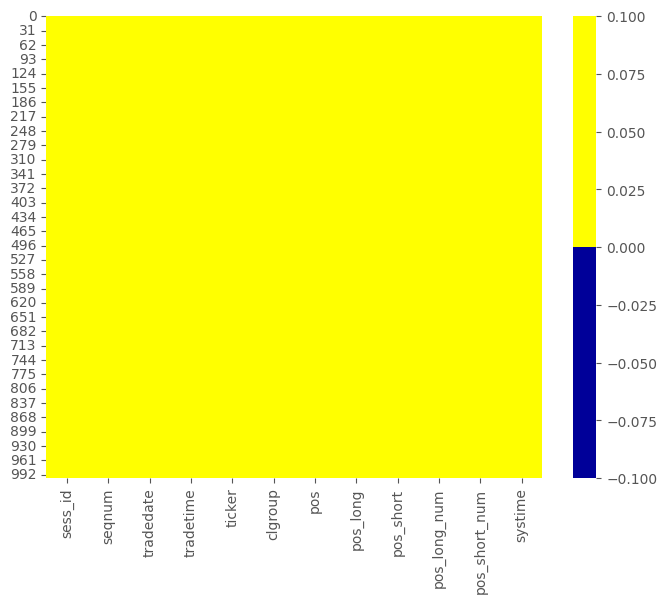

In [71]:
cols = df.columns[:1000] # первые 1000 колонок
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

### Аномальные значения

In [72]:
df_fiz = df[df['clgroup'] == 'FIZ']
df_yur = df[df['clgroup'] == 'YUR']
# Разделение таблицы для FIZ по ticker
fiz_tables = {}
for ticker, group in df_fiz.groupby('ticker'):
    fiz_tables[ticker] = group.drop(['sess_id', 'seqnum', 'tradedate', 'tradetime', 'systime', 'ticker', 'clgroup'], axis=1).reset_index().drop('index', axis=1)


# Вывод подтаблиц для FIZ
for ticker, table in fiz_tables.items():
    print(f"Подтаблица для ticker '{ticker}':")
    print(table)

# Разделение таблицы для YUR по ticker
yur_tables = {}
for ticker, group in df_yur.groupby('ticker'):
    yur_tables[ticker] = group.drop(['sess_id', 'seqnum', 'tradedate', 'tradetime', 'systime', 'ticker', 'clgroup'], axis=1).reset_index().drop('index', axis=1)

# Вывод подтаблиц для YUR
for ticker, table in yur_tables.items():
    print(f"Подтаблица для ticker '{ticker}':")
    print(table)

Подтаблица для ticker 'AF':
    pos  pos_long  pos_short  pos_long_num  pos_short_num
0  -197      9329      -9526           303            227
1  -197      9329      -9526           303            227
2  -197      9329      -9526           303            227
3  -197      9341      -9538           303            228
4  -197      9341      -9538           303            228
5  -197      9341      -9538           303            228
6  -197      9341      -9538           303            228
7  -197      9341      -9538           303            228
8  -197      9341      -9538           303            228
9  -197      9341      -9538           303            228
10 -197      9341      -9538           303            228
11 -197      9341      -9538           303            228
12 -197      9341      -9538           303            228
13 -197      9341      -9538           303            228
Подтаблица для ticker 'AL':
     pos  pos_long  pos_short  pos_long_num  pos_short_num
0  -9562     30

In [73]:
# Применим describe() к каждой подтаблице в fiz_tables и yur_tables
for ticker, table in fiz_tables.items():
    description = table[['pos', 'pos_long', 'pos_short', 'pos_long_num', 'pos_short_num']].describe()
    print(f"Статистика для подтаблицы ticker '{ticker}' (FIZ):")
    print(description)

for ticker, table in yur_tables.items():
    description = table[['pos', 'pos_long', 'pos_short', 'pos_long_num', 'pos_short_num']].describe()
    print(f"Статистика для подтаблицы ticker '{ticker}' (YUR):")
    print(description)

Статистика для подтаблицы ticker 'AF' (FIZ):
         pos     pos_long    pos_short  pos_long_num  pos_short_num
count   14.0    14.000000    14.000000          14.0      14.000000
mean  -197.0  9338.428571 -9535.428571         303.0     227.785714
std      0.0     5.109784     5.109784           0.0       0.425815
min   -197.0  9329.000000 -9538.000000         303.0     227.000000
25%   -197.0  9341.000000 -9538.000000         303.0     228.000000
50%   -197.0  9341.000000 -9538.000000         303.0     228.000000
75%   -197.0  9341.000000 -9538.000000         303.0     228.000000
max   -197.0  9341.000000 -9526.000000         303.0     228.000000
Статистика для подтаблицы ticker 'AL' (FIZ):
               pos      pos_long     pos_short  pos_long_num  pos_short_num
count    14.000000     14.000000     14.000000     14.000000           14.0
mean  -9601.071429  30240.214286 -39841.285714    690.071429          394.0
std      26.004332     35.218392      9.367937      1.141139          

Не очень наглядно. Применим IQR.

#### Поиск аномальных значений с использованием IQR (Interquartile Range) ####

In [74]:
# Создайте список столбцов, для которых вы хотите вычислить аномальные значения
columns_to_check = ['pos', 'pos_long', 'pos_short', 'pos_long_num', 'pos_short_num']

# Применение IQR для каждого столбца в подтаблице FIZ
for ticker, table in fiz_tables.items():
    if not table.empty:
        for column in columns_to_check:
            # Вычисляем межквартильный размах (IQR) для текущего столбца
            Q1 = table[column].quantile(0.25)
            Q3 = table[column].quantile(0.75)
            IQR = Q3 - Q1

            # Определяем границы для выявления выбросов
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Находим аномальные значения для текущего столбца
            anomalies = table[(table[column] < lower_bound) | (table[column] > upper_bound)]

            # Выводим аномальные значения для текущего столбца и тикера, если они есть
            if not anomalies.empty:
                print(f"Аномальные значения для столбца '{column}' и тикера '{ticker}' (FIZ):")
                print(anomalies)

# Применение IQR для каждого столбца в подтаблице YUR
for ticker, table in yur_tables.items():
    if not table.empty:
        for column in columns_to_check:
            # Вычисляем межквартильный размах (IQR) для текущего столбца
            Q1 = table[column].quantile(0.25)
            Q3 = table[column].quantile(0.75)
            IQR = Q3 - Q1

            # Определяем границы для выявления выбросов
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Находим аномальные значения для текущего столбца
            anomalies = table[(table[column] < lower_bound) | (table[column] > upper_bound)]

            # Выводим аномальные значения для текущего столбца и тикера, если они есть
            if not anomalies.empty:
                print(f"Аномальные значения для столбца '{column}' и тикера '{ticker}' (YUR):")
                print(anomalies)

Аномальные значения для столбца 'pos_long' и тикера 'AF' (FIZ):
   pos  pos_long  pos_short  pos_long_num  pos_short_num
0 -197      9329      -9526           303            227
1 -197      9329      -9526           303            227
2 -197      9329      -9526           303            227
Аномальные значения для столбца 'pos_short' и тикера 'AF' (FIZ):
   pos  pos_long  pos_short  pos_long_num  pos_short_num
0 -197      9329      -9526           303            227
1 -197      9329      -9526           303            227
2 -197      9329      -9526           303            227
Аномальные значения для столбца 'pos_short_num' и тикера 'AF' (FIZ):
   pos  pos_long  pos_short  pos_long_num  pos_short_num
0 -197      9329      -9526           303            227
1 -197      9329      -9526           303            227
2 -197      9329      -9526           303            227
Аномальные значения для столбца 'pos_short_num' и тикера 'BR' (FIZ):
     pos  pos_long  pos_short  pos_long_num  pos_

### Неинформативные признаки
Будем откидывать признаки, у которых больше 95% одинаковых значений

In [75]:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

sess_id: 100.00000%
sess_id
6913    1000
Name: count, dtype: int64

tradedate: 100.00000%
tradedate
2023-10-24    1000
Name: count, dtype: int64



In [76]:
# Откидываем их
df.drop(['sess_id', 'tradedate'], axis=1)

,seqnum,tradetime,ticker,clgroup,pos,pos_long,pos_short,pos_long_num,pos_short_num,systime
0,57,23:50:00,BR,YUR,-29328,34551,-63879,77,45,2023-10-24 23:50:06
1,57,23:50:00,AL,YUR,9562,63447,-53885,6,25,2023-10-24 23:50:06
2,57,23:50:00,AL,FIZ,-9562,30294,-39856,692,394,2023-10-24 23:50:06
3,57,23:50:00,NG,FIZ,23626,405914,-382288,13752,3820,2023-10-24 23:50:06
4,57,23:50:00,BR,FIZ,29328,233112,-203784,12478,2050,2023-10-24 23:50:06
...,...,...,...,...,...,...,...,...,...,...
995,44,22:45:00,GZ,FIZ,141811,178395,-36584,5383,1718,2023-10-24 22:45:06
996,44,22:45:00,MG,YUR,-1903,271,-2174,3,8,2023-10-24 22:45:06
997,44,22:45:00,ED,YUR,-66913,630893,-697806,44,13,2023-10-24 22:45:06
998,44,22:45:00,AF,FIZ,-197,9341,-9538,303,228,2023-10-24 22:45:06


### Отбрасываем повторяющиеся записи

***Надо обговорить, что мы считаем под одинаковыми записями***

In [79]:
# отбрасываем неуникальные строки
df_dedupped = df.drop_duplicates()

# сравниваем формы старого и нового наборов
print(df.shape)
print(df_dedupped.shape)

(1000, 12)
(1000, 12)


### Приводим всё к верхним регистрам

In [77]:
df['ticker'] = df['ticker'].str.upper()
df['clgroup'] = df['clgroup'].str.upper()
df[['ticker', 'clgroup']].value_counts(dropna=False)

ticker   clgroup
AF       FIZ        14
MM       FIZ        14
MN       FIZ        14
AF       YUR        14
MX       FIZ        14
                    ..
USDRUBF  YUR        13
VB       FIZ        13
         YUR        13
VI       FIZ        13
YN       FIZ        13
Name: count, Length: 72, dtype: int64